# Изучение рынка заведений общественного питания Москвы

- Автор: Заславский Данила
- Дата: 15.04.25

### Цели и задачи проекта

**Цель:** Провести исследовательский анализ данных рынка общественного питания Москвы на основе данных сервисов Яндекс Карты и Яндекс Бизнес.

**Задачи:** 
1. Загрузить данные и ознакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных:
    - изучить категории заведений, представленные в данных;
    - исследовать распределение количества заведений по административным округам Москвы;
    - изучить соотношение сетевых и несетевых заведений в целом и в разрезе категорий заведения;
    - исследовать количество посадочных мест в заведениях;
    - исследовать рейтинг заведений;
    - изучить взаимосвязь рейтинга заведений с другими данными;
    - изучить вариацию среднего чека заведения в зависимости от района Москвы.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Данные состоят из двух датасетов:

- `rest_info.csv` - информация о заведениях общественного питания;
- `rest_price.csv` - информация о среднем чеке в заведениях общественного питания.

**Описание датасета `rest_info`:**

- `name` - название заведения;
- `address` - адрес заведния;
- `district` - административный район;
- `category` - категория заведения;
- `hours` - информация о днях и часах работы;
- `rating` - рейтинг заведения по оценкам пользователей в Яндекс Картах;
- `chain`- является ли заведение сетевым;
- `seats` - количество посадочных мест.

**Описание датасета `rest_price`:**

- `price` - категория цен в заведении;
- `avg_bill` - средняя стоимость заказа в виде диапазона;
- `middle_avg_bill` - оценка среднего чека;
- `middle_coffee_cup` - оценка одной чашки капучино.

### Содержимое проекта

[1. Загрузка данных и знакомство с ними](#chapter1)    
[2. Предобработка данных](#chapter2)    
[3. Исследовательский анализ данных](#chapter3)    
[4. Итоговый вывод и рекомендации](#chapter4)



## 1. Загрузка данных и знакомство с ними
<a id='chapter1'></a>

Начнём с загрузки библиотек и датасетов `rest_info.csv` и `rest_price.csv`. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в двух переменных: `rest_info` и `rest_price`.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

#Загружаем библиотеку для расчета коэффициента корреляции phi_k
!pip install -q phik
from phik import phik_matrix
import phik

In [2]:
# Выгружаем данные в переменные rest_info и rest_price
rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Познакомимся с данными датасета `rest_info.csv` - выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`:

In [3]:
# Выводим первые строки датафрейма на экран
rest_info.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выводим информацию о датафрейме
rest_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания.

После первичного анализа можно сделать выводы:

- названия столбцов приведены к одному виду и отражают содержимое столбцов;
- шесть столбцов представлены типом `object`. Это `id`, `name`, `category`, `address`, `district`, `hours`. Тип данных соответсвует содержимому этих столбцов;
- два столбца представлены типом `float64`: `rating` и `seats`. Столбец `seats` содержит количество посадочных мест, рекомендуется использовать тип `Int64`;
- столбец `chain` представлен типом `int64`. Так как он содержит признак, является ли заведение сетевым, и содержит значения 1 и 0 - рекомендуется использовать тип `int8`;
- пропуски расположены в стлолбцах `hours` и `seats`.

Теперь познакомимся с данными датасета `rest_price.csv`:

In [5]:
#выводим первые строки датафрейма на экран
rest_price.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
#выводим информацию о датафрейме
rest_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о среднем чеке в заведениях общественного питания. По аналогии можно отметить, что:

- названия столбцов приведены к одному виду и отражают сождержимое столбцов;
- три столбца представлены типом `object`: `id`, `price`, `avg_bill`. Тип данных соответсвует содержимому столбцов;
- два столбца представлены типов `float64`: `middle_avg_bill` и `middle_coffee_cup`. Тип данных соответсвует содержимому столбцов;
- пропуски расположены в столбцах `price`, `avg_bill`, `middle_avg_bill` и `middle_coffee_cup`.

---

### Промежуточный вывод



Первичное знакомство с данными показывает, что датасет `rest_info` содержит 9 столбцов и 8406 строк, а датасет `rest_price` - 5 столбцов и 4058 строк. Все столбцы и их содержимое сооответствут представленному описанию, но датасеты имеют разную размерность. Датасет `rest_info` содержит пропуски в 2 столбцах, датасет `rest_price` содержит пропуски в 4 столбцах. В обоих датасетах используется корректный тип данных, но в некоторых столбцах их можно оптимизировать.
Столбец `middle_coffee_cup` содержит большое количество пропусков, вероятно, заполнен только для кофеен. Столбец `seats` содержит большое количество пропусков, можно предположить, что данные не собирались для заведений без посадочных мест (фудкорты, доставка)

### Подготовка единого датафрейма

Соединим данные, используя значение параметра `how` - `left`:

In [7]:
#соединяем данные в единый датафрейм
df = rest_info.merge(rest_price, on = 'id', how = 'left')

In [8]:
#выводим информацию об объединённом датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


Данные соединены, информация о всех заведениях общественного питания сохранена.

## 2. Предобработка данных
<a id='chapter2'></a>

В датасете встречаются типы данных, которые следует оптимизировать. Проведём преобразование необходимым столбцам:

In [9]:
#Приведём столбец `seats` к типу int16, а `chain` - int8
df = df.astype({
    'seats': 'Int64',
    'chain': 'int8'
})

In [10]:
#Проверим типы данных в датафрейме с помощью атрибута dtypes
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                  Int64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

Типы данных были успешно оптимизированы и преобразованы.

При первичном анализе мы обнаружили пропуски в столбцах датафрейма. Узнаем абсолютное и относительное количество пропусков в столбцах датасета:

In [2]:
# Делаем копию текущего датасета
tmp = df.copy()          
missing = (pd.DataFrame({'Кол-во пропусков': tmp.isnull().sum(), 'Доля пропусков': tmp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

NameError: name 'df' is not defined

Датафрейм `df` содержит 26956 пропущенных значений, среди них:

- 536 пропусков в столбце `hours`;
- 3611 пропусков в столбце `seats`;
- 5091 пропуск в столбце `price`;
- 4590 пропусков в столбце `avg_bill`;
- 5257 пропусков в столбце `middle_avg_bill`;
- 7871 пропуск в столбце `middle_coffee_cup`.

Причинами возникновения пропусков в столбцах могут быть ошибки при сборе данных, отсутствие или потеря информации. Например, пропуски в столбце `seats` могут быть из-за того, что в заведении отсутсвуют места или их количество неизвестно (фудкорт, доставка), пропуски в столбце `middle_coffee_cup` могут свидетельствовать о том, что информация была собрана в одной из категорий заведений. Проведём обработку пропущенных заведений:

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, проанализирваны пропуски, сделаны предположения о причинах.</font>

Пропуски в столбце `hours` заполним значением-индикатором 'Нет информации':

In [15]:
#проверяем количество уникальных значений
df['hours'].nunique()

1307

In [16]:
#заменяем пропуски на индикатор 'нет информации'
df['hours'] = df['hours'].fillna('Информация отсутсвует')
#проверяем новое количество уникальных значений
df['hours'].nunique()

1308

Узнаем категории заведений, где есть содержимое в столбце `middle_coffee_cup`:

In [18]:
coffee_shops = df[df['middle_coffee_cup'].notna()]
# Анализ категорий этих заведений
coffee_categories = coffee_shops['category'].value_counts()
coffee_categories.head()

кофейня            521
бар,паб              6
кафе                 4
пиццерия             3
быстрое питание      1
Name: category, dtype: int64

Предположение подтвержается - столбец заполнен в основном в кофейнях.
Проверим типы данных и количество элементов после обработки пропусков:   

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              8406 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int8   
 8   seats              4795 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), float64(3), int8(1), object(8)
memory usage: 870.2+ KB


Проверим данные на наличие явных и неявных дубликатов. Начнём с полных дубликатов:

In [20]:
#проверяем полные дубликаты в датафрейме
df.duplicated().sum()

0

В датафрейме нет полных дубликатов строк. Проверим неявные дубликаты - значения по полям  `name` и `address` должны быть уникальными:

In [21]:
#производим нормализацию данных в столбцах 'name' и 'address'
df['name'] = df['name'].str.upper().str.strip()
df['address'] = df['address'].str.upper().str.strip()

In [22]:
#найдём дубликаты в столбцах 'name' и 'address'
dup_name = df['name'].duplicated().sum()
dup_address = df['address'].duplicated().sum()
print(f'В датафрейме содержится {dup_name} одинаковых наименований и {dup_address} одинаковых адресов')

В датафрейме содержится 2894 одинаковых наименований и 2654 одинаковых адресов


In [23]:
#Проверим дубликаты в паре Наименование - Адрес:
df.loc[df.duplicated(subset = ['name','address'], keep = False)]


,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,КАФЕ,кафе,"МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ",Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,<NA>,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,КАФЕ,кафе,"МОСКВА, ПАРК АНГАРСКИЕ ПРУДЫ",Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,<NA>,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,MORE POKE,ресторан,"МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2",Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,MORE POKE,ресторан,"МОСКВА, ВОЛОКОЛАМСКОЕ ШОССЕ, 11, СТР. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,ресторан,"МОСКВА, ПРОСПЕКТ МИРА, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,РАКОВАРНЯ КЛЕШНИ И ХВОСТЫ,"бар,паб","МОСКВА, ПРОСПЕКТ МИРА, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,ХЛЕБ ДА ВЫПЕЧКА,булочная,"МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19",Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,ХЛЕБ ДА ВЫПЕЧКА,кафе,"МОСКВА, ЯРЦЕВСКАЯ УЛИЦА, 19",Западный административный округ,Информация отсутсвует,4.1,0,276,NaN,NaN,NaN,NaN


In [24]:
#Удалим дубликаты:
df = df.drop_duplicates(subset=['name', 'address'], keep='first')

In [25]:
#проверим датафрейм
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8402 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8402 non-null   object 
 1   name               8402 non-null   object 
 2   category           8402 non-null   object 
 3   address            8402 non-null   object 
 4   district           8402 non-null   object 
 5   hours              8402 non-null   object 
 6   rating             8402 non-null   float64
 7   chain              8402 non-null   int8   
 8   seats              4792 non-null   Int64  
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: Int64(1), float64(3), int8(1), object(8)
memory usage: 869.7+ KB


Было найдено 4 неявных дубликата. Для их удаления был использован метод `drop_duplicated`. После удаления дубликатов в датасете осталось 8402 строки.

Для дальнейшей работы создадим столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:

In [26]:
#создаём столбец `is_24_7`
df['is_24_7'] = df['hours'] == 'ежедневно, круглосуточно'
#проверяем содержимое
df['is_24_7'].sum()

730

In [27]:
#проверка типа данных нового столбца
df['is_24_7'].dtype

dtype('bool')

In [28]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

False    7672
True      730
Name: is_24_7, dtype: int64

Анализ показал, что 730 заведений работают ежедневно, круглосуточно.

In [29]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
 Осталось строк в датасете после обработки 8402 
 Удалено строк в датасете после обработки 4 
 Процент потерь 0.05


---

### Промежуточный вывод



Во время предобработки данных были выполнены следующие действия:
- оптимизация типов данных: столбец `seats` был приведён к типу `Int64`, стлобец `chain` - к типу `int8`;
- обработка пропусков: в столбце `hours` заполнены значением `нет информации` (536 строк);
- очистка от дубликатов: удалено 4 дубликата (0,05% данных) по связке 'название + адрес'. Итоговый объём датасета составил 8402 значения;
- добавлен новый столбец-признак `is_24_7`, благодаря чему было выявлено 730 круглосуточных заведений.
Было замечено, что данные о средней цене чашки кофе присутсвуют только у 6,4 % заведений (преимущественно в кофейнях), 43% заведений не содержат информацию о посадочных местах.
Данные подготовлены для исследовательского анализа.


## 3. Исследовательский анализ данных
<a id='chapter3'></a>


---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

Разберём столбец `category`, который хранит категории заведений. Рассчитаем количество объектов общественного питания по каждой категории: 

In [30]:
#проверяем распределение заведений по категориям
print('Распределение заведений по категориям столбца "category":')
df['category'].value_counts()

Распределение заведений по категориям столбца "category":


кафе               2376
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

Результаты показывают, что всего в этом столбце 8 уникальных категорий.

Для визуального анализа такого распределения можно использовать столбчатые диаграммы. Визуализируем распределение в столбце `category`:

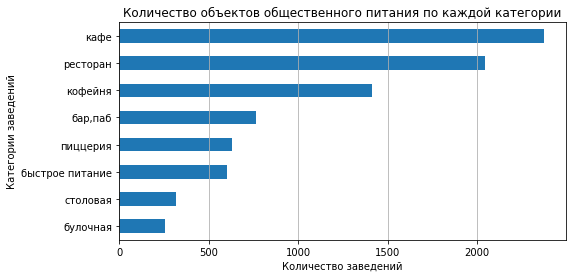

In [31]:
#создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize =(8, 4))

#строим столбчатую горизонтальную диаграмму с помощью pandas через plot
df['category'].value_counts().sort_values(ascending = True).plot(
               kind = 'barh',
               legend = False, 
               title = 'Количество объектов общественного питания по каждой категории')

#настраиваем оформление
plt.xlabel('Количество заведений')
plt.ylabel('Категории заведений')
plt.grid(axis = 'x')


Визуализация полностью отражает распределение категорий согласно расчетам сверху. Из распределения видно, что кафе (2376) и ресторан (2042) - самые популярные категории, а столовая (315) и булочная (256) - самые непопулярные.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

Узнаем, какие уникальные административные округа есть в Москве и получим количество заведений в каждом методом `value_counts()`:

In [32]:
 df['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             898
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

Визуализируем распределение с помощью библиотеки `seaborn`:

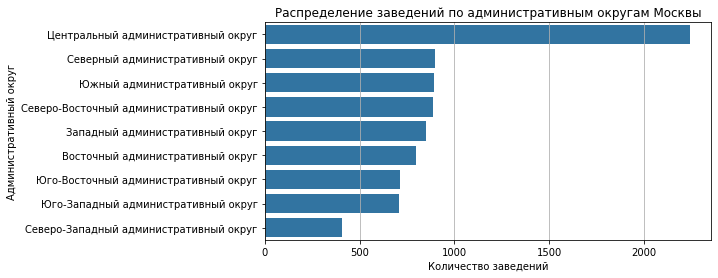

In [33]:
#создаём контейнер для графика matplotlib и задаём его размер
plt.figure(figsize =(8, 4))

#строим график
ax = sns.countplot(
                  data = df, 
                  y = 'district', 
                  color = '#1f77b4',
                  order = df['district'].value_counts().index)

plt.title('Распределение заведений по административным округам Москвы')
plt.xlabel('Количество заведений')
plt.ylabel('Административный округ')
plt.grid(axis = 'x')

Из диаграммы следует, что Центральный АО является лидером по количеству заведений (2242), тогда как Северо-Западный АО имеет самое меньшее количество (409). Остальные округа распределены равномерно в диапазоне 700-900.

Теперь рассмотрим распределение категорий заведений в Центральном административном округе Москвы:

In [34]:
#считаем распределение категорий заведений в ЦАО
c_district = df.loc[df['district'] == 'Центральный административный округ', 'category'].value_counts().reset_index()
print(c_district)

             index  category
0         ресторан       670
1             кафе       464
2          кофейня       428
3          бар,паб       364
4         пиццерия       113
5  быстрое питание        87
6         столовая        66
7         булочная        50


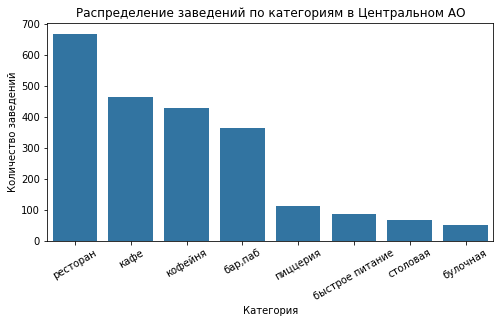

In [35]:
#создаём контейнер для графика и задаём его размер
plt.figure(figsize =(8, 4))

#строим диаграмму
ax = sns.barplot(
        data = c_district,
        x = 'index',
        y = 'category',
        color = '#1f77b4')

plt.title('Распределение заведений по категориям в Центральном АО')
plt.xlabel('Категория')
plt.ylabel('Количество заведений')
plt.xticks(rotation = 30)
plt.show()

Из распределения видно, что самая популярная категория заведений в ЦАО - ресторан (670). Также популярны кафе (464), кофейня (428), бар,паб (364). Наименее популярная категория - булочная (50).

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

Расчитаем сотношение сетевых и несетевых заведений в целом по всем данным:

In [36]:
#расчёт соотношения сетевых и несетевых заведений
is_chain = df['chain'].value_counts(normalize = True) * 100
print(is_chain)

0    61.878124
1    38.121876
Name: chain, dtype: float64


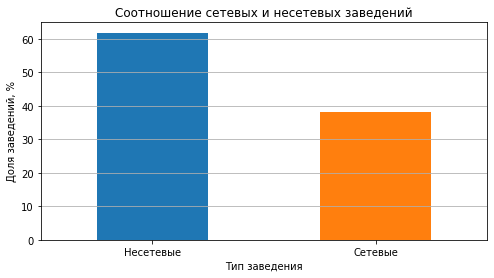

In [37]:
#создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 4))

#строим график
is_chain.plot(
    kind = 'bar',
    color=['#1f77b4', '#ff7f0e'],
    title = 'Соотношение сетевых и несетевых заведений')
plt.xlabel('Тип заведения')
plt.ylabel('Доля заведений, %')
plt.xticks([0, 1], ['Несетевые', 'Сетевые'], rotation = 0)
plt.grid(axis='y')

Только 38,1 % заведений относятся к какой-либо сети, остальные 61,9% - несетевые. 

Рассмотрим категории заведения в зависимости от типа, найдём наиболее популярные среди сетевых:

In [38]:
#расчитаем количество заведений по категориям в зависимости от типа
df.groupby('category')['chain'].value_counts()

category         chain
бар,паб          0         596
                 1         168
булочная         1         157
                 0          99
быстрое питание  0         371
                 1         232
кафе             0        1597
                 1         779
кофейня          1         720
                 0         693
пиццерия         1         330
                 0         303
ресторан         0        1313
                 1         729
столовая         0         227
                 1          88
Name: chain, dtype: int64

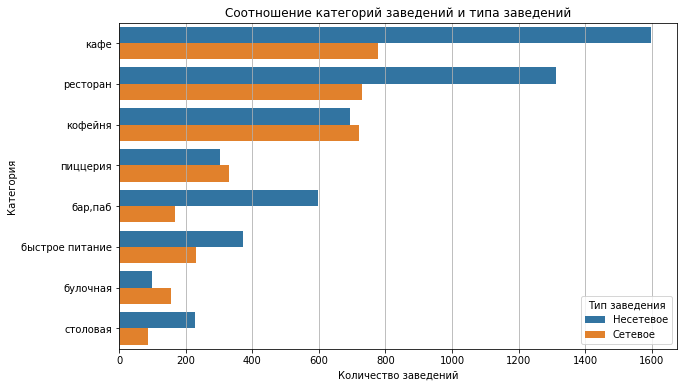

In [39]:
#создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

sns.countplot(
    data = df,
    y = 'category',
    hue = 'chain')

plt.title('Соотношение категорий заведений и типа заведений')
plt.xlabel('Количество заведений')
plt.ylabel('Категория')
plt.grid(axis = 'x')

plt.legend(
    title='Тип заведения',
    labels=['Несетевое', 'Сетевое'])
plt.show()

Из соотношения видно, что чаще являются сетевыми заведениями такие категории:
- кофейня (720 сетевых и 693 несетевых);
- пиццерия (330 сетевых и 303 несетевых);
- булочная (157 сетевых и 99 несетевых).

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


Построим данные о количестве посадочных мест в заведениях в столбце `seats`. При знакомстве с подобными данными стоит оценить статистические показатели. Воспользуемся методом `describe()`:

In [40]:
print('Изучаем статистические показатели столбца seats:')
df['seats'].describe()

Изучаем статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Можно предположить, что данные о количестве мест имеют распределение, близкое к правому ассиметричному, так как медиана (75) меньше среднего (108.4). Значение стандартного отклонения имеет значение 122.8, что в данном случае может говорить о широком разбросе. Разница между максимальным значением и минимальным это подтверждает.

Дополнительно проверим это и построим гистограмму распределения значений и диаграмму размаха:

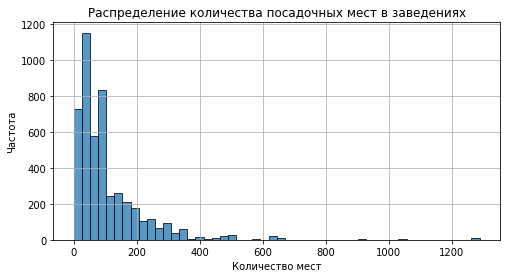

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['seats'].plot(
              kind = 'hist',
              bins = 50,
              alpha = 0.75,
              edgecolor = 'black',
              rot = 0)

#настраиваем оформление
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество мест')
plt.ylabel('Частота')
plt.grid()
plt.show()



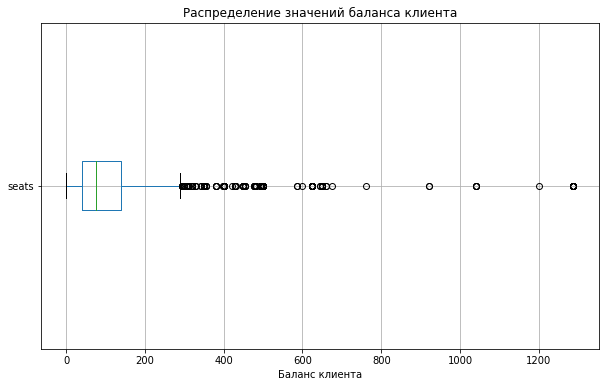

In [42]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='seats', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений баланса клиента')
plt.xlabel('Баланс клиента')

# Выводим график
plt.show()

Распределение данных действительно выглядит как правое ассиметричное и характеризуется "хвостами" в правой части диаграмм. Такие высокие значения можно отнести к выбросам. Однако сами значения, как минимальные, так и максимальные, не выглядят ошибкой, и такое количество посадочных мест вполне допустимо. Поэтому при анализе их оставим.

Теперь для каждой категории приведём типичное для неё количество мест:

Медианное количество посадочных мест по категориям:
          category  seats
0         ресторан   86.0
1          бар,паб   82.0
2          кофейня   80.0
3         столовая   75.5
4  быстрое питание   65.0
5             кафе   60.0
6         пиццерия   55.0
7         булочная   50.0


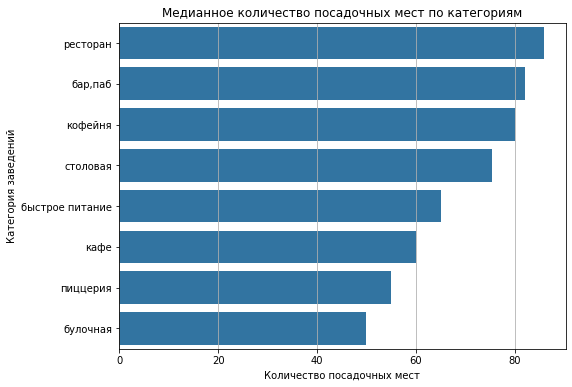

In [43]:
#рассчитываем медианные значения
median_seats = df.groupby('category')['seats'].median().sort_values(ascending=False).reset_index()
print('Медианное количество посадочных мест по категориям:')
print(median_seats)
#создаём график
plt.figure(figsize=(8, 6))
sns.barplot(
       data = median_seats,
       x = 'seats',
       y = 'category',
    color = '#1f77b4')
plt.title("Медианное количество посадочных мест по категориям")
plt.xlabel("Количество посадочных мест")
plt.ylabel("Категория заведений")
plt.grid(axis = 'x')
plt.show()

Распределение показывает, что самое большое типичное количество посадочных мест имеют рестораны (86), бары, пабы(82) и кофейни (80), тогда как булочные наименьшее (50).


---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

Рассчитаем и визуализируем распределение средних рейтингов по категориям заведений:

In [44]:
mean_ratings = df.groupby('category')['rating'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
print('Усреднённые значения рейтинга по категориям заведений:')
print(mean_ratings)

Усреднённые значения рейтинга по категориям заведений:
          category    rating
0          бар,паб  4.387696
1         пиццерия  4.301264
2         ресторан  4.290402
3          кофейня  4.277282
4         булочная  4.268359
5         столовая  4.211429
6             кафе  4.124285
7  быстрое питание  4.050249


<Figure size 864x432 with 0 Axes>

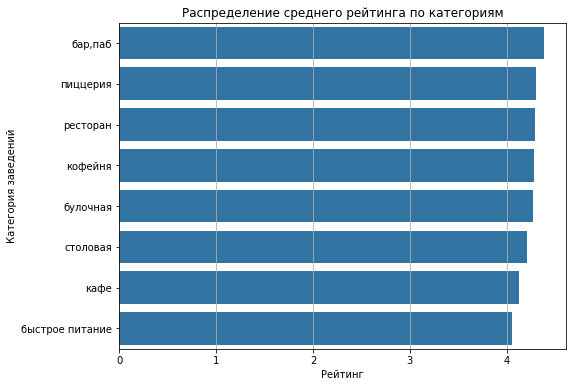

In [45]:
#создаём график
plt.figure(figsize=(8, 6))
sns.barplot(
       data = mean_ratings,
       x = 'rating',
       y = 'category',
    color = '#1f77b4')
plt.title("Распределение среднего рейтинга по категориям")
plt.xlabel("Рейтинг")
plt.ylabel("Категория заведений")
plt.grid(axis = 'x')
plt.show()

Исходя из результатов визуализации, усреднённые рейтинги для разных типов общепита имеют небольшой разброс. Так, наивысший рейтинг имеют бары, пабы - 4.39, а низший - заведения быстрого питания - 4.05.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

Чтобы понять, существует ли связь между данными, воспользуемся матрицей корреляции рейтинга заведения с другими столбцами. Для этого воспользуемся универсальной библиотекой `phik`, которая помогает изучить связи между данными разного типа. Для составления матрицы были выбраны данные, которые могут влиять на рейтинг заведений: категория, положение, статус сетевого заведения, количество мест, ценовая категория и режим работы:

In [46]:
# Вычисляем корреляционную матрицу с использованием phi_k
corr_matrix = df[['category', 'district', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix(interval_cols = ['rating'])

# выводим результат, оставив только корреляцию со столбцом рейтинга
print('Корреляционная матрица с коэффициентом phi_k для переменной rating')
corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

Корреляционная матрица с коэффициентом phi_k для переменной rating


,rating
price,0.220295
district,0.200761
category,0.189716
seats,0.152723
is_24_7,0.150365
chain,0.107833


Наибольшая корреляция, хоть и небольшая, наблюдается ценовой категорией заведения (0,22) и административным районом Москвы (0,2). У остальных признаков коэффициент корреляции снижается с 0,19 до 0,11. Визуализируем результат корреляции с помощью тепловой карты:

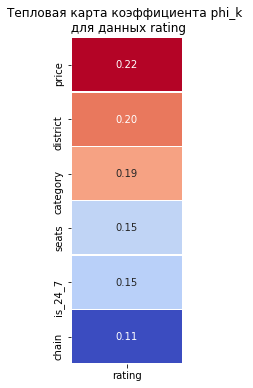

In [47]:
# Строим тепловую карту
plt.figure(figsize=(2, 6))

# Сохраняем матрицу корреляции признака rating с другими признаками клиента
data_heatmap = corr_matrix.loc[corr_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')

# Выводим график
plt.show()

Теперь корреляция между рейтингом заведений и другими признаками наглядно отображена. Можно продолжить исследование данных. Рассмотрим связь между рейтингом заведения и ценовой категорией:

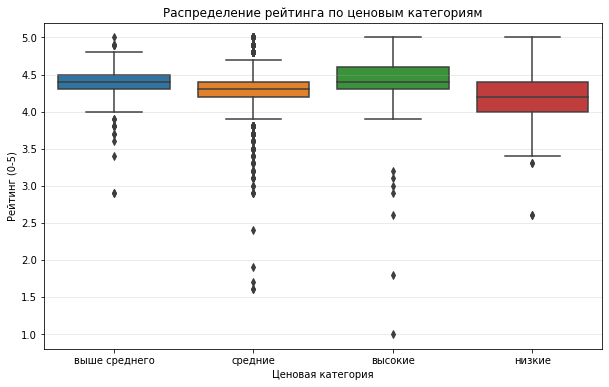

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='price',
    y='rating')
plt.title('Распределение рейтинга по ценовым категориям')
plt.xlabel('Ценовая категория')
plt.ylabel('Рейтинг (0-5)')
plt.grid(axis='y', alpha=0.3)
plt.show()

Средние значения рейтинга по ценовой категории заведений:
           price    rating
0        высокие  4.436611
1  выше среднего  4.386348
2        средние  4.297874
3         низкие  4.173077


<Figure size 864x432 with 0 Axes>

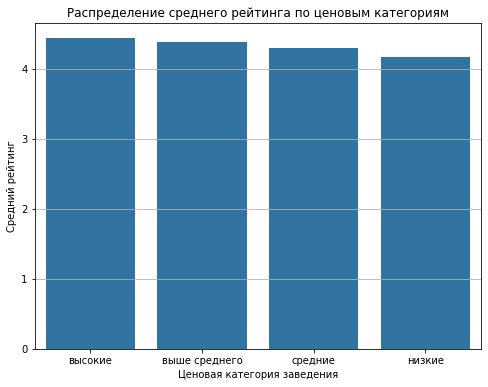

In [49]:
mean_ratings_price = df.groupby('price')['rating'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
print('Средние значения рейтинга по ценовой категории заведений:')
print(mean_ratings_price)
#создаём график
plt.figure(figsize=(8, 6))
sns.barplot(
       data = mean_ratings_price,
       x = 'price',
       y = 'rating',
    color = '#1f77b4')
plt.title("Распределение среднего рейтинга по ценовым категориям")
plt.xlabel("Ценовая категория заведения")
plt.ylabel("Средний рейтинг")
plt.grid(axis = 'y')
plt.show()

Наибольший медианный рейтинг имеют заведения с высокими ценами, а наименьшей - с низкими. При этом заведения среднего диапазона имеют наибольшие выбросы в сторону меньших значений рейтинга.
Можно отметить, что средний рейтинг увеличивается с ростом ценовой категории заведения

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

Сгруппируем данные по названию заведений и найдём топ-15 популярных сетевых заведений в Москве:

ШОКОЛАДНИЦА                            120
ДОМИНО'С ПИЦЦА                          76
ДОДО ПИЦЦА                              74
ONE PRICE COFFEE                        71
ЯНДЕКС ЛАВКА                            69
COFIX                                   65
PRIME                                   50
ХИНКАЛЬНАЯ                              44
КОФЕПОРТ                                42
КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ     39
ТЕРЕМОК                                 38
ЧАЙХАНА                                 37
COFEFEST                                32
БУХАНКА                                 32
МУ-МУ                                   27
Name: name, dtype: int64


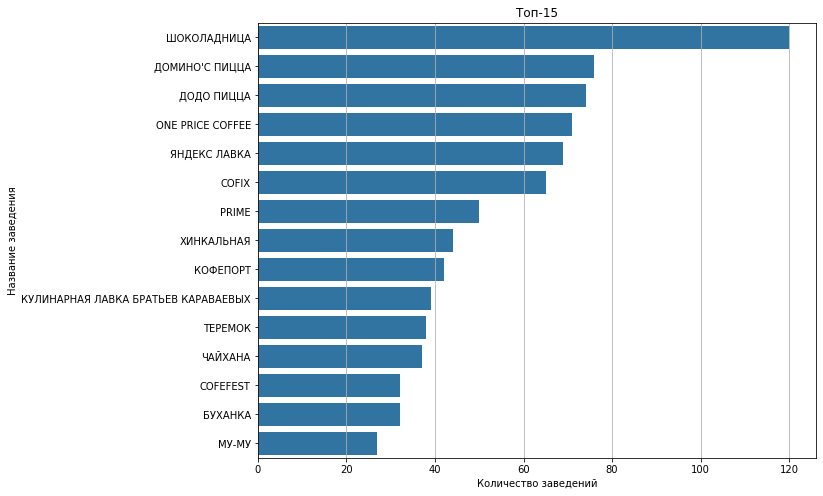

In [50]:
top_15 = df[df['chain'] == 1]['name'].value_counts().head(15)
print(top_15)
#создаём график
plt.figure(figsize=(10, 8))
sns.barplot(
       x = top_15.values,
       y = top_15.index,
       color = '#1f77b4')
plt.title("Топ-15")
plt.xlabel("Количество заведений")
plt.ylabel("Название заведения")
plt.grid(axis = 'x')
plt.show()

Самым популярным заведением является "Шоколадница", имеющая 120 торговых точек. Рассмотрим значение среднего рейтинга и категорию популярных заведений:

In [51]:

top_15_full = (
    df[df['chain'] == 1]
    .groupby('name')
    .agg(
        num_locations=('name', 'count'),
        avg_rating=('rating', 'mean'),
        main_category=('category', pd.Series.mode))
    .sort_values('num_locations', ascending=False)
    .head(15))
print(top_15_full)

                                     num_locations  avg_rating main_category
name                                                                        
ШОКОЛАДНИЦА                                    120    4.177500       кофейня
ДОМИНО'С ПИЦЦА                                  76    4.169737      пиццерия
ДОДО ПИЦЦА                                      74    4.286486      пиццерия
ONE PRICE COFFEE                                71    4.064789       кофейня
ЯНДЕКС ЛАВКА                                    69    3.872464      ресторан
COFIX                                           65    4.075385       кофейня
PRIME                                           50    4.116000      ресторан
ХИНКАЛЬНАЯ                                      44    4.322727          кафе
КОФЕПОРТ                                        42    4.147619       кофейня
КУЛИНАРНАЯ ЛАВКА БРАТЬЕВ КАРАВАЕВЫХ             39    4.394872          кафе
ТЕРЕМОК                                         38    4.123684      ресторан

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Не сделана визуализация среднего рейтинга сетевых заведений. Лучше строить горизонтальную столбчатую диаграмму, примерно вот так:</font>
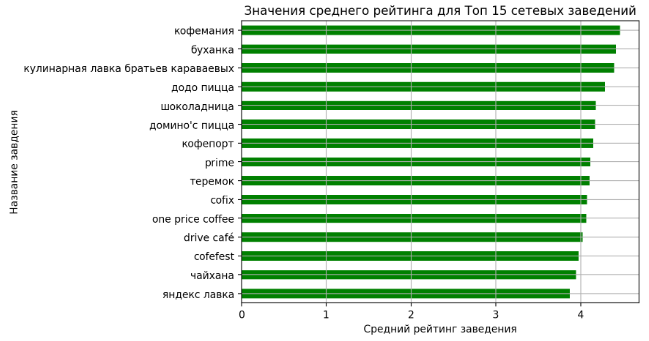

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Добавлена визуализация среднего рейтинга для топ-15 популярных сетевых заведений:

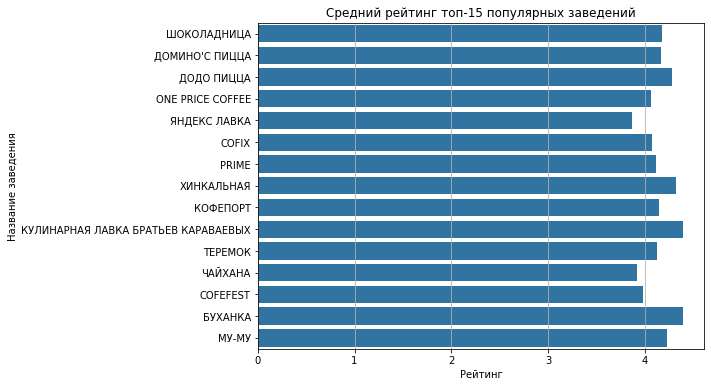

In [52]:
#создаём график
plt.figure(figsize=(8, 6))
sns.barplot(
       data = top_15_full,
       x = 'avg_rating',
       y = top_15_full.index,
    color = '#1f77b4')
plt.title("Средний рейтинг топ-15 популярных заведений")
plt.xlabel("Рейтинг")
plt.ylabel("Название заведения")
plt.grid(axis = 'x')
plt.show()

Среди 15 популярных сетевых заведений 5 относятся к кофейням, 4 к кафе, 3 к ресторанам, 2 к пиццериям и 1 к булочным. Средний рейтинг находится в диапазоне от 3.87 (Яндекс.Лавка, 5 место) до 4.4 (Буханка, 14 место).

---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Следовало проанализировать статистические показатели данных по среднему чеку заведений методом `.describe()`.</font><br>
<font color='Red'> Следует визуализировать анализ среднего чека заведений гистограммой и диаграммой размаха, для оценки размаха распределения, его симметричности и наличия выбросов. Примерно вот так:</font>
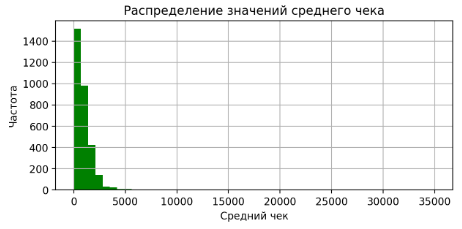
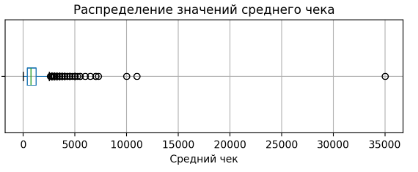

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Внесены необходимы доработки: использован метод descibe(), использованы визуализации в виде гистограммы и диаграммы размаха:

In [53]:
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053668
std       1009.732845
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

Медиана (750) меньше чем среднее (958), что говорит о том, что распределение данных по среднему чеку правое ассиметричное. Также имеется высокое отклонение (1009.7). Построим гистрограмму и диаграмму размаха:

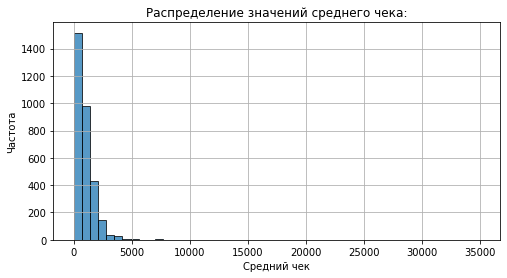

In [54]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(8, 4))

# Строим гистограмму с помощью pandas через plot(kind='hist')
df['middle_avg_bill'].plot(
              kind = 'hist',
              bins = 50,
              alpha = 0.75,
              edgecolor = 'black',
              rot = 0)

#настраиваем оформление
plt.title('Распределение значений среднего чека:')
plt.xlabel('Средний чек')
plt.ylabel('Частота')
plt.grid()
plt.show()


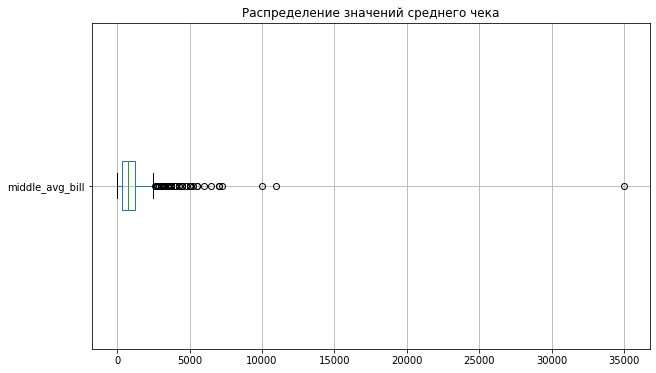

In [55]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 6))

# Строим диаграмму размаха значений в столбце balance
df.boxplot(column='middle_avg_bill', vert=False)

# Добавляем заголовок и метки оси
plt.title('Распределение значений среднего чека')

# Выводим график
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 График не оформлен необходимым образом, нет подписи оси Х.</font>

Распределение данных действительно выглядит как правое ассиметричное и характеризуется "хвостами" в правой части диаграмм. Такие высокие значения можно отнести к выбросам. Однако сами значения, даже максимальные, не выглядят ошибкой, и такое размер чека может быть допустим. Поэтому при анализе их оставим.

Средние значения среднего чека:
                                  district  middle_avg_bill
0       Центральный административный округ      1191.057547
1          Западный административный округ      1053.225490
2          Северный административный округ       927.959627
3             Южный административный округ       834.398089
4   Северо-Западный административный округ       822.222930
5         Восточный административный округ       820.626923
6      Юго-Западный административный округ       792.561702
7  Северо-Восточный административный округ       716.611296
8     Юго-Восточный административный округ       654.097938


<Figure size 864x432 with 0 Axes>

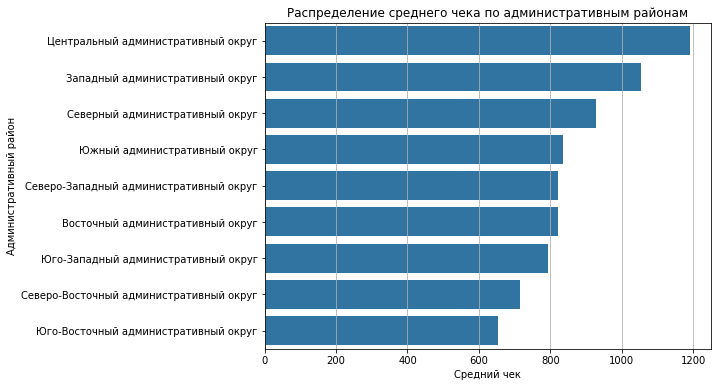

In [56]:
mean_middle_avg_bill = df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
print('Средние значения среднего чека:')
print(mean_middle_avg_bill)

#создаём график
plt.figure(figsize=(8, 6))
sns.barplot(
       data = mean_middle_avg_bill,
       x = 'middle_avg_bill',
       y = 'district',
    color = '#1f77b4')
plt.title("Распределение среднего чека по административным районам")
plt.xlabel("Средний чек")
plt.ylabel("Административный район")
plt.grid(axis = 'x')
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>Более полный анализ центральной тенденции среднего чека заведений по административным округам был бы при выводе и медианы, и среднего значения среднего чека, примерно вот так:</font>
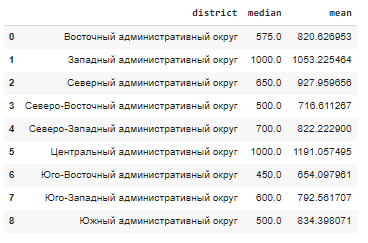<br>
<font color='DarkMagenta'>Хорошо визуализированы значения среднего чека заведений по административным округам. Можно было вывести на диаграмму и медианы, и средние значения, примерно вот так:</font>
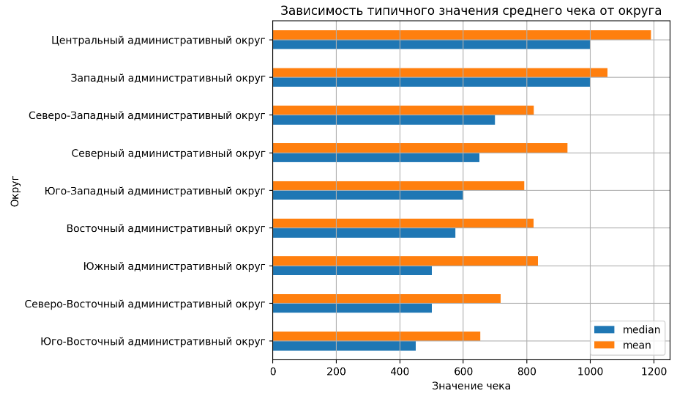

Как видно из визуализации, самый высокий средний чек имеет Центральный АО (1191), также высокие значения имеют Западный (1053) и Северный (928) АО. Самый низкий средний чек в Юго-Восточном административном округе(654). 

Проанализируем цены в Центральном административном округе и других:

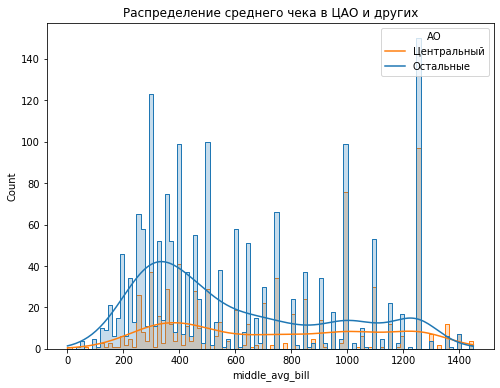

In [57]:
#создаём столбец `is_central`
df['is_central'] = df['district'] == 'Центральный административный округ'

#строим гистограмму распределения среднего чека в ЦАО и других
plt.figure(figsize=(8, 6))
sns.histplot(
    df[df['middle_avg_bill'] < 1500], 
    x = 'middle_avg_bill',
    bins = 100,
    hue = 'is_central',
    kde = True, element="step")
plt.title('Распределение среднего чека в ЦАО и других')
plt.legend(
    title='АО',
    labels=['Центральный', 'Остальные'])
plt.show()

Данные были отфильтрованы для более детального рассмотрения в диапазон, близкий к средним значениям для всех округов(до 1500). Распределение на полном диапазоне неинформативно и тяжело для визуального восприятия.

Исходя из диаграммы, можно предположить, что размер среднего чека в ЦАО достаточно равномерный во всём диапазоне, тогда как в остальных округах преобладают более низкие значения (до 700). Построим диаграммы размаха:

---


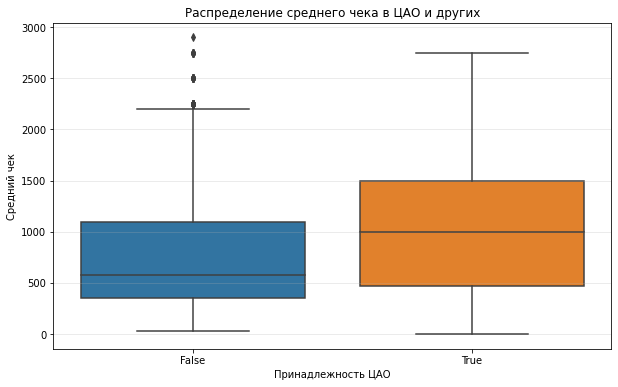

In [58]:
#строим график
plt.figure(figsize=(10, 6))
sns.boxplot(
     data =df[df['middle_avg_bill'] < 3000],
    x='is_central',
    y='middle_avg_bill')
plt.title('Распределение среднего чека в ЦАО и других')
plt.xlabel('Принадлежность ЦАО')
plt.ylabel('Средний чек')
plt.grid(axis='y', alpha=0.3)
plt.show()

Данные отфильтрованы до 3000 для лучшего визуального восприятия. Из диаграмм видно, что медианное значение среднего чека в ЦАО выше, а само распределение близко к нормальному, тогда как в остальных округах медиана ниже, а распределение правое ассиметричное.

Можно сделать вывод, что удалённость от центра влияет на цены в заведениях, а именно: чем дальше от центра - тем ниже цены.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>Хорошо, что анализ среднего чека заведений по административным округам заканчивается развернутым промежуточным выводом.</font>

---

### Промежуточный вывод


Исследовательский анализ данных показал, что: 
- в данных представлено 8 категорий заведений, среди которых наиболее популярны кафе (2376), рестораны (2042) и кофейни (1413);
- центральный АО лидирует по количеству заведений (2242), в нём преобладают рестораны (670), кафе (464) и кофейни (428);
- 61,9% заведений - несетевые, 38,1% - сетевые. К категориям, где сетевых заведений больше, относятся: кофейни, пиццерии и булочные;
- среднее значение посадочных мест - 108, медианное - 75. Наибольшее количество мест имеют рестораны (86) и бары/пабы(82), наименьшее - булочные (50) и пиццерии (55);
- самый высокий рейтинг заведений имеют бары/пабы (4,39), самый низкий - заведения быстрого питания (4,05);
- наибольшая корреляция рейтинга с ценовой категорией (0,22). Можно отметить, что чем заведение дороже и ближе к центру, тем рейтинг выше;
- лидерами среди популярных сетевых заведений является "Шоколадница" (120), "Додо Пицца" (74) и "Буханка" (32);
- расположение влияет на средний чек, так, самый высокий средний чек в Центральном АО (1191), а самый низкий - в Юго-Восточном АО (654). Близость к центру увеличивает средний чек.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'> Правильно сделан промежуточный вывод по исследовательскому анализу данных заведений общественного питания.</font>

## 4. Итоговый вывод и рекомендации
<a id='chapter4'></a>
По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

### общий обзор проделанной работы

В ходе исследования было проведён комплексный анализ данных о заведениях общественного питания Москвы, включающий:
- загрузку и предобработку данных (оптимизация типов, пропусков, уладеление дубликатов);
- исследовательский анализ по ключевым параметрам: категории заведений, распределение по округам, сетевость, посадочные места, рейтинги, средний чек;
- визуализацию результатов с использованием библиотек matplotlib, seaborn и phik для корреляционного анализа.

Исходные данные содержали 8406 заведений, после очистки осталось 8402. Были обработаны пропуски в столбце `hours`. Добавлен столбец-индикатор `is_24_7`.

### Ответы на исследовательские вопросы и главные выводы

1) Какие категории заведений преобладают:
- **Лидеры:** кафе (2376), рестораны (2042), кофейни (1413).
- **Аутсайдеры:** столовые (315), булочные (256).
- **Вывод:** Москва — город кафе и ресторанов, тогда как столовые и булочные менее распространены.

2) Как заведения распределены по округам:
- **Центральный АО** — абсолютный лидер (2242 заведения).
- **Наименьшее число заведений** в Северо-Западном АО (409).
- **В ЦАО** преобладают рестораны (670), кафе (464), кофейни (428).

3) Соотношение сетевых и несетевых заведений:
- **61.9%** — несетевые, **38.1%** — сетевые.
- **Сетевые чаще встречаются среди:** кофеен (720), пиццерий (330), булочных (157).
- **Вывод:** Кофейни и фастфуд чаще развиваются как сети, тогда как рестораны и кафе остаются локальными.

4) Количество посадочных мест:
- **Среднее значение:** 108 места, медиана — 75.
- **Самые вместительные:** рестораны (86), бары (82).
- **Наименьшие:** булочные (50), пиццерии (55).

5) Рейтинги заведений:
- **Самые высокие оценки:** бары/пабы (4.39), пиццерии (4.30).
- **Самые низкие:** фастфуд (4.05).
- **Зависимость:** Чем выше ценовая категория, тем выше рейтинг (корреляция 0.22).

6) Влияние местоположения на средний чек:
- **Центральный АО:** 1191 руб. — самый дорогой.
- **Юго-Восточный АО:** 654 руб. — самый дешёвый.
- **Вывод:** Удалённость от центра снижает средний чек.

7) Топ-15 сетевых заведений:
- **Лидеры:** "Шоколадница" (120 точек), "Додо Пицца" (74), "Буханка" (32).
- **Средний** рейтинг сетей: 4.0–4.4.

8) Влияние расположения на средний чек:
- **Самый высокий** средний чек в Центральном АО (1191 руб.).
- **Самый низкий** — в Юго-Восточном АО (654 руб.).
- **Вывод:** Центр Москвы — наиболее престижная и дорогая локация для общепита.

### Рекомендации на основе анализа данных

При открытии нового заведения обращать внимание:
- Выбор категории:
    - Кофейни и пиццерии — высокий спрос + популярность сетевого формата;
    - Столовые и булочные — низкая конкуренция, но узкая аудитория.
- Выбор локации:
    - Центр Москвы — для премиальных заведений (высокий чек, но высокая конкуренция);
    - Спальные районы (Юго-Восточный, Северо-Западный АО) — для демократичных кафе с умеренными ценами.
    
При развитии сетевых проектов стоит остановиться на кофейне и фаст-фуде:
- Уже доказанная эффективность сетевой модели (например, "Шоколадница", "Додо Пицца");
- Возможность масштабирования в менее насыщенных округах (Восточный, Юго-Восточный АО).
 
Для повышения рейтинга:
- улучшить сервис в фаст-фуде: более низкие рейтинги (4.05) указывают на недовольство клиентов;
- акцент на атмосферу в барах/ресторанах: высокие оценки (4.3–4.4) показывают, что клиенты ценят качество обслуживания.

Для маркетинговых стратегий:
- Продвижение круглосуточных заведений: 730 заведений работают 24/7 — потенциальная аудитория ночных клиентов.
- Использование данных о среднем чеке: в ЦАО можно предлагать премиум-меню, в спальных районах — бюджетные варианты.



<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошее обобщение всего исследования. 👍</font>
<br><font color='DarkMagenta'>👉 После исправления ошибок его необходимо откорректировать.</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Данила, проект отлично структурирован и проработан.<br>Так держать и дальше!<br></font>
<font color='Red'>🛠 Что нужно, что бы сделать проект лучше:</font><br>
<font color='Red'>🛠 Исправить замену пропусков в количестве посадочных мест заведений. Визуализировать средний рейтинг по топ-15 сетевых заведений. Визуализировать анализ среднего чека заведений гистограммой и диаграммой размаха.</font><br>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов будут приобретены дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Успехов.</font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Критические замечания были исправлены.

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Данила! Удалось справиться со всеми заданиями в проекте. Молодец! 😄 Спасибо за работу!<br>
Входе выполнения проекта научились проводить исследовательский анализ данных, определять когда необходимо анализировать медианы или средние значения и визуализировать анализ. В данном проекте акцентировано внимание, что анализ проводится в целях дальнейшего принятия бизнес-решения по открытию заведения общественного питания инвестиционным фондом.</font><br>
<font color='DarkGreen'>👌 Теперь, вперед за новыми знаниями и навыками! Удачи! 😉</font>
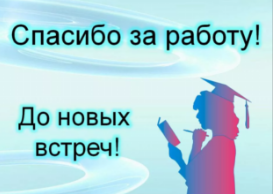